<a href="https://colab.research.google.com/github/JJungEEun/2023_DaconStudy/blob/main/KBO%20%ED%83%80%EC%9E%90%20OPS%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%A0%95%EC%9D%80/01)EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import random
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
cd /content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data

/content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data


### Load Dataset

1. Regular_Season_Batter.csv : KBO에서 활약한 타자들의 역대 정규시즌 성적을 포함하여 몸무게, 키 ,생년월일 등의 기본정보

2. Regular_Season_Batter_Day_by_Day.csv: KBO에서 활약한 타자들의 일자 별 정규시즌 성적

3. Pre_Season_Batter.csv : KBO에서 활약한 타자들의 역대 시범경기(정규시즌 직전에 여는 연습경기) 성적

4. submission.csv : 참가자들이 예측해야 할 타자의 이름과 아이디 목록

In [86]:
regular = pd.read_csv('Regular_Season_Batter.csv')
daybyday = pd.read_csv('Regular_Season_Batter_Day_by_Day_b4.csv')
preseason = pd.read_csv('Pre_Season_Batter.csv')
submission = pd.read_csv('submission.csv')

In [4]:
regular.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [5]:
daybyday.head()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [6]:
preseason.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


OPS
- OPS: 출루율 + 장타율
- 출루율: (안타+볼넷+몸에 맞는공) / (타수+볼넷+몸에맞는공+희생플라이)
- 장타율: (단타+2X2루타+3X3루타+4X홈런) / 타수
- OPS 범위 기준

|구분|기준 OPS|
|---|---|
|A+|1.000|
|A|.950|
|B|.850|
|C|.770|
|D|.666|
|F|그이하|

### EDA

#### 프리시즌

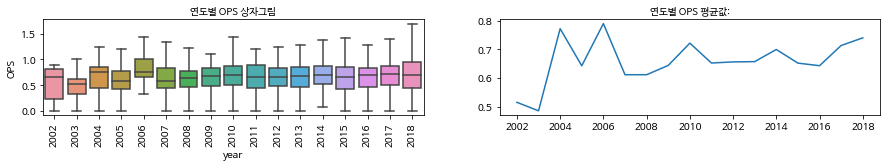

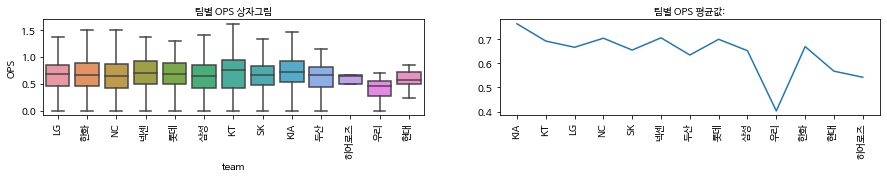

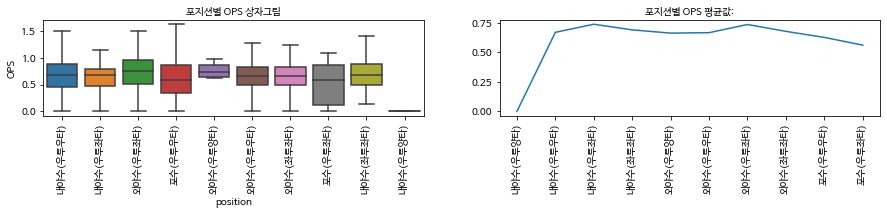

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(3,2,1) 
g= sns.boxplot(x='year', y='OPS', data=preseason, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,2)
plt.plot(preseason.groupby('year')['OPS'].mean()) 
plt.title('연도별 OPS 평균값:', size=10)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(3,2,3) 
g = sns.boxplot(x='team', y='OPS', data=preseason, showfliers=False)
g.set_title('팀별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,4)
plt.plot(preseason.groupby('team')['OPS'].mean()) 
plt.title('팀별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(3,2,5) 
g = sns.boxplot(x='position', y='OPS', data=preseason, showfliers=False)
g.set_title('포지션별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,6)
plt.plot(preseason.groupby('position')['OPS'].mean()) 
plt.title('포지션별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()

In [ ]:
preseason['year'].value_counts()

2018    182
2017    167
2016    153
2015    134
2014    117
2013    104
2012     87
2011     75
2010     72
2009     66
2008     61
2007     43
2005     37
2006     36
2004     28
2003     19
2002     12
Name: year, dtype: int64

In [ ]:
preseason['team'].value_counts()

두산      186
LG      174
SK      169
롯데      166
삼성      149
KIA     132
한화      131
넥센      112
NC       88
KT       57
현대       18
우리        6
히어로즈      5
Name: team, dtype: int64

In [ ]:
preseason['position'].value_counts()

내야수(우투우타)    548
외야수(우투우타)    198
외야수(좌투좌타)    169
외야수(우투좌타)    162
포수(우투우타)     154
내야수(우투좌타)    108
내야수(좌투좌타)     33
포수(우투좌타)      14
외야수(우투양타)      6
내야수(우투양타)      1
Name: position, dtype: int64

In [ ]:
preseason.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [8]:
preseason = preseason.rename(columns={"G": "게임출전수", "AB": "타수","R":"득점","H":"안타","2B":"2루타","3B":"3루타","HR":"홈런","TB":"토탈베이스",
                          "RBI":"타점","SB":"도루","CS":"도루실패","BB":"볼넷", "HBP":"데드볼", "SO":"삼진", "GDP":"병살타","SLG":"장타율",
                          "OBP":"출루율","E":"실책", "OPS":"출루율-장타율"})

In [19]:
preseason.corr()['출루율-장타율'].sort_values(ascending=False)

출루율-장타율      1.000000
장타율          0.961944
출루율          0.865307
토탈베이스        0.464214
안타           0.397155
홈런           0.394804
타점           0.378170
2루타          0.307295
득점           0.301075
볼넷           0.201346
타수           0.148324
3루타          0.117101
데드볼          0.079176
도루           0.063304
게임출전수        0.058661
year         0.051496
도루실패         0.042884
병살타          0.042631
삼진           0.015086
실책           0.014341
batter_id   -0.067036
Name: 출루율-장타율, dtype: float64

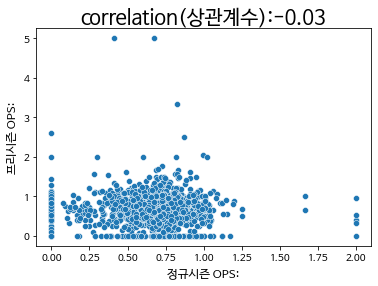

In [10]:
correlation=regular["OPS"].corr(preseason["출루율-장타율"])
sns.scatterplot(regular["OPS"], preseason["출루율-장타율"])
plt.title('correlation(상관계수):'+str(np.round(correlation,2)), fontsize=20)
plt.xlabel('정규시즌 OPS:', fontsize=12)
plt.ylabel('프리시즌 OPS:', fontsize=12)
plt.show()

#### 정규시즌

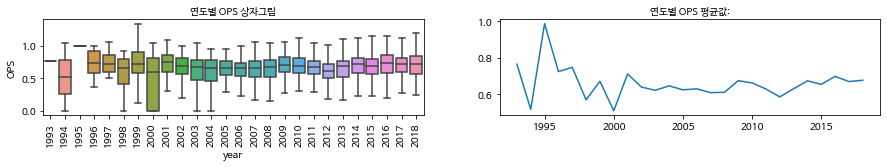

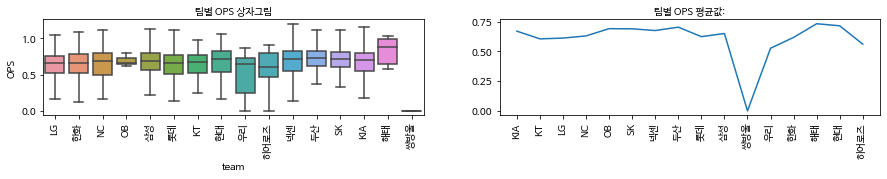

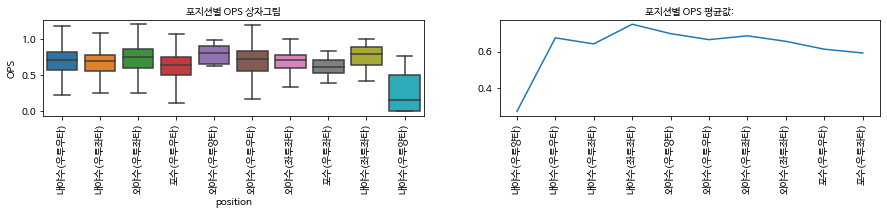

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(3,2,1) 
g= sns.boxplot(x='year', y='OPS', data=regular, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,2)
plt.plot(regular.groupby('year')['OPS'].mean()) 
plt.title('연도별 OPS 평균값:', size=10)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(3,2,3) 
g = sns.boxplot(x='team', y='OPS', data=regular, showfliers=False)
g.set_title('팀별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,4)
plt.plot(regular.groupby('team')['OPS'].mean()) 
plt.title('팀별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(3,2,5) 
g = sns.boxplot(x='position', y='OPS', data=regular, showfliers=False)
g.set_title('포지션별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,6)
plt.plot(regular.groupby('position')['OPS'].mean()) 
plt.title('포지션별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()

In [12]:
regular['year'].value_counts()

2018    227
2017    217
2016    213
2015    207
2013    194
2014    186
2012    174
2011    151
2010    130
2009    124
2008    115
2007     98
2006     85
2005     73
2004     68
2003     54
2002     43
2001     32
2000     20
1999     14
1998     10
1997      8
1996      7
1994      2
1993      1
1995      1
Name: year, dtype: int64

In [13]:
regular['team'].value_counts()

한화      302
롯데      298
LG      294
두산      282
삼성      280
SK      254
KIA     254
넥센      172
NC      131
KT       85
현대       60
우리       13
히어로즈     13
해태       12
OB        3
쌍방울       1
Name: team, dtype: int64

In [14]:
regular['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [23]:
regular = regular.rename(columns={"G": "게임출전수", "AB": "타수","R":"득점","H":"안타","2B":"2루타","3B":"3루타","HR":"홈런","TB":"토탈베이스",
                          "RBI":"타점","SB":"도루","CS":"도루실패","BB":"볼넷", "HBP":"데드볼", "SO":"삼진", "GDP":"병살타","SLG":"장타율",
                          "OBP":"출루율","E":"실책", "OPS":"출루율-장타율"})

In [25]:
regular.corr()['출루율-장타율'].sort_values(ascending=False)

출루율-장타율      1.000000
장타율          0.971387
출루율          0.935797
avg          0.919696
토탈베이스        0.589841
타점           0.576652
안타           0.571506
득점           0.558242
2루타          0.556933
타수           0.546879
볼넷           0.546328
게임출전수        0.534539
홈런           0.525660
삼진           0.507726
병살타          0.460984
데드볼          0.418250
도루실패         0.283267
실책           0.280126
3루타          0.269084
도루           0.240282
year         0.054094
batter_id   -0.039554
Name: 출루율-장타율, dtype: float64

In [87]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=padosori60&logNo=220716970587

In [99]:
regular2 = regular[:]

In [100]:
regular2.isna().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

In [116]:
regular2['f1'] = ((regular['SB']+3) +(regular['SB']+regular['CS']+7)-0.4)*20
regular2['f2'] = np.sqrt((regular['SB']+regular['CS']) / (regular['H'] - regular['2B'] - regular['3B'] -regular['HR']) + regular['BB'] + regular['HBP'])/0.07
regular2['f3'] = regular['3B'] / (regular['AB'] - regular['HR'] - regular['SO']) / 0.02 * 10
regular2['f4'] = ((regular['R']-regular['HR']) / (regular['H'] + regular['BB'] + regular['HR'] - regular['HBP']) - 0.1) / 0.04
regular2['f5'] = (0.005-regular['GDP']) / (regular['AB']-regular['HR']-regular['SO']) / 0.005

regular2['spd'] = (regular2['f1'] + regular2['f2'] + regular2['f3'] + regular2['f4'] + regular2['f5']) / 5
regular2 = regular2.fillna(0)
regular2.head(3)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,f1,f2,f3,f4,f5,spd
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0,0.902,392.0,59.093684,0.000000,4.190141,-3.993333,90.258098
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,192.0,0.000000,0.000000,0.000000,inf,0.000000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,192.0,55.328334,26.315789,5.564516,-3.491228,55.143482


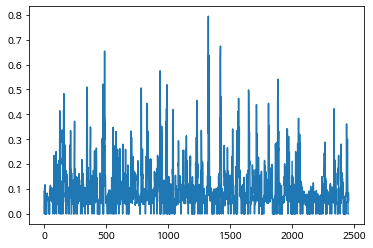

In [140]:
plt.plot(regular2['spd']/1000)

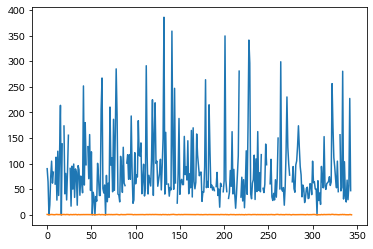

In [119]:
plt.plot(regular2.groupby('batter_id').mean()[['spd','OPS']])

### 정규시즌과 프리시즌 차이

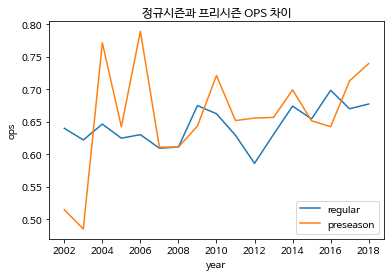

In [60]:
regular_ops = regular.groupby('year')['출루율-장타율'].mean()
preseason_ops = preseason.groupby('year')['출루율-장타율'].mean()
ops_df = pd.concat([regular_ops, preseason_ops],axis=1)[9:]

plt.plot(ops_df)
plt.title('정규시즌과 프리시즌 OPS 차이')
plt.xlabel('year')
plt.ylabel('ops')
plt.legend(['regular', 'preseason'], loc=4)
plt.show()

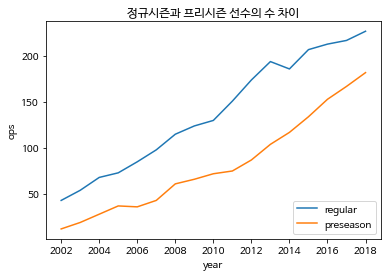

In [63]:
regular_cnt = regular.groupby('year')['batter_name'].count()
preseason_cnt = preseason.groupby('year')['batter_name'].count()
ops_cnt = pd.concat([regular_cnt, preseason_cnt],axis=1)[9:]

ops_cnt
plt.plot(ops_cnt)
plt.title('정규시즌과 프리시즌 선수의 수 차이')
plt.xlabel('year')
plt.ylabel('ops')
plt.legend(['regular', 'preseason'], loc=4)
plt.show()

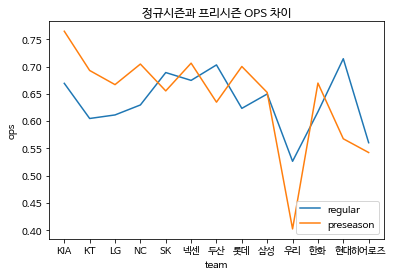

In [80]:
regular_Tops = regular.groupby('team')['출루율-장타율'].mean()
preseason_Tops = preseason.groupby('team')['출루율-장타율'].mean()
Tops_df = pd.concat([regular_Tops, preseason_Tops],axis=1).dropna(axis=0)


Tops_df
plt.plot(Tops_df)
plt.title('정규시즌과 프리시즌 OPS 차이')
plt.xlabel('team')
plt.ylabel('ops')
plt.legend(['regular', 'preseason'], loc=4)
plt.show()

In [68]:
print("프리", preseason['team'].unique())
print("정규", regular['team'].unique())

프리 ['LG' '한화' 'NC' '넥센' '롯데' '삼성' 'KT' 'SK' 'KIA' '두산' '히어로즈' '우리' '현대']
정규 ['LG' '한화' 'NC' 'OB' '삼성' '롯데' 'KT' '현대' '우리' '히어로즈' '넥센' '두산' 'SK' 'KIA'
 '해태' '쌍방울']


### 일자별

In [141]:
daybyday

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,0,0,0,0,1,0,0,0,0.158,2018
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0.150,2018
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,0,0,0,0,0,0,1,0,0.182,2018
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0.182,2018


- 초봉과 OPS 관계
- 나이와 OPS 관계
- spd와 OPS 관계
- 일자별 성적과 일자별 온도 습도의 관계
  + https://blog.naver.com/kma_131/221846278683
  + 이게 진짜일까 ...